# MA336: AI & ML Applications - Final Project
*Roja Annamalai Rajanbabu* - ***Reg No.:*** *2320904*

# Predicting Customer Churn in Credit Card Services Using Artificial Intelligence and Machine Learning Techniques

## Introduction
Customer retention is a crucial aspect of business sustainability, especially in the financial services sector where competition is fierce. The ability to predict customer churn—when customers stop using a service—allows companies to proactively address issues and implement strategies to retain valuable customers. This project focuses on developing a predictive model to identify features which are likely to cause churning from a credit card service.

## Methodology

### Data Understanding and Exploration
1. Define the Problem statement
2. Begin by loading the dataset into a suitable environment (e.g., Python with pandas).
3. Examine the features and target variable.
4. Understand what each feature represents.

### Exploratory Data Analysis (EDA)
1. Loading the necessary packages
2. Understand the variable types
3. Check the distribution of each feature.
4. Check for the imbalance in the target variable.
5. Check the correlation between features and the target variable.

### Data Engineering
1. Identify and handle any missing values appropriately.
2. Create new features if necessary. For example, customer tenure, credit utilization ratio, etc.
3. Convert categorical features into numerical values using techniques like one-hot encoding or label encoding.
4. Normalize or standardize features to ensure they contribute equally to the model.

### Addressing Class Imbalance
Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to increase the number of churned samples.

### Model Selection
We choose to use Random Forests and Neural Networks to address the problem.

### Model Training and Evaluation
1. Train-Test Split: Split the dataset into training and testing sets (e.g., 80-20 split).
2. Train the selected models on the training dataset.
3. Evaluate the models using appropriate metrics such as:
  1. Accuracy: Overall performance.
  2. Precision: Proportion of true positive churns out of predicted positive churns.
  3. Recall: Proportion of true positive churns out of actual churns.
  4. F1 Score: Harmonic mean of precision and recall.
  5. ROC-AUC: Area under the receiver operating characteristic curve.
  6. Cross-Validation: Use cross-validation to ensure model robustness and avoid overfitting.

### Model Tuning
1. Use techniques like Grid Search or Random Search to find the best hyperparameters for your models.
2. Analyse feature importance to understand which features contribute most to the prediction.

### Final Model Selection and Testing
1.  on evaluation metrics and cross-validation results, select the best-performing model.

## Data Understanding and Exploration

In this project, we aim to ***Predict the features that are Likely to cause Customer Churn*** so that predictive measures can be taken to retain them.

The Dataset used is sourced from [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers). It comprises 10,127 entries with 21 features, including demographic information, financial metrics, and details about their credit card usage. 

Below is the brief summary of the variables:

1. **CLIENTNUM**: Unique identifier for the customer.
2. **Attrition_Flag**: Indicates whether the customer has churned ("Attrited Customer") or not ("Existing Customer").
3. **Customer_Age**: Age of the customer.
4. **Gender**: Gender of the customer.
5. **Dependent_count**: Number of dependents.
6. **Education_Level**: Educational qualification of the customer.
7. **Marital_Status**: Marital status of the customer.
8. **Income_Category**: Annual income category of the customer.
9. **Card_Category**: Type of credit card.
10. **Months_on_book**: Period of relationship with the bank.
11. **Total_Relationship_Count**: Total number of products held by the customer.
12. **Months_Inactive_12_mon**: Number of months inactive in the last 12 months.
13. **Contacts_Count_12_mon**: Number of contacts in the last 12 months.
14. **Credit_Limit**: Credit limit of the credit card.
15. **Total_Revolving_Bal**: Total revolving balance on the credit card.
16. **Avg_Open_To_Buy**: Open to buy credit line (average of last 12 months).
17. **Total_Amt_Chng_Q4_Q1**: Change in transaction amount (Q4 over Q1).
18. **Total_Trans_Amt**: Total transaction amount in the last 12 months.
19. **Total_Trans_Ct**: Total transaction count (last 12 months).
20. **Total_Ct_Chng_Q4_Q1**: Change in transaction count (Q4 over Q1).
21. **Avg_Utilization_Ratio**: Average card utilization ratio.

The primary goal of this project is to build a robust machine learning model that can accurately predict customer churn. By doing so, the credit card company can target at-risk customers with personalized retention strategies, thereby reducing churn rates and increasing customer loyalty.

### Importing the Necessary Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Loading the Dataset

In [8]:
master_data = pd.read_csv('BankChurners.csv')

master_data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

## Exploratory Data Analysis (EDA)

The target variable is **'Attrition_Flag'**, indicating whether a customer has stopped using the credit card service. Notably, the dataset is imbalanced, with only 16.07% of customers having churned, presenting a unique challenge for the predictive modelling process.

***Note: We Are removing the CLIENTNUM as these are unique customer id from the dataset.***

In [10]:
master_data = master_data.drop(columns=['CLIENTNUM'])

#### Interpretation of Variables Types

The discrete, continuous, and categorical variables are as follows:

In [12]:
def classify_variables(data):
    discrete_vars = [col for col in data.columns if data[col].dtype in ['int64', 'int32'] and data[col].nunique() / len(data[col]) < 0.1]
    continuous_vars = [col for col in data.columns if data[col].dtype in ['float64', 'float32'] or (data[col].dtype in ['int64', 'int32'] and data[col].nunique() / len(data[col]) >= 0.1)]
    categorical_vars = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
    
    return discrete_vars, continuous_vars, categorical_vars

discrete_vars, continuous_vars, categorical_vars = classify_variables(master_data)

print("Discrete Variables:", discrete_vars)
print()
print("Continuous Variables:", continuous_vars)
print()
print("Categorical Variables:", categorical_vars)

Discrete Variables: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct']

Continuous Variables: ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical Variables: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


### Understanding Each Variable With the Target Variable

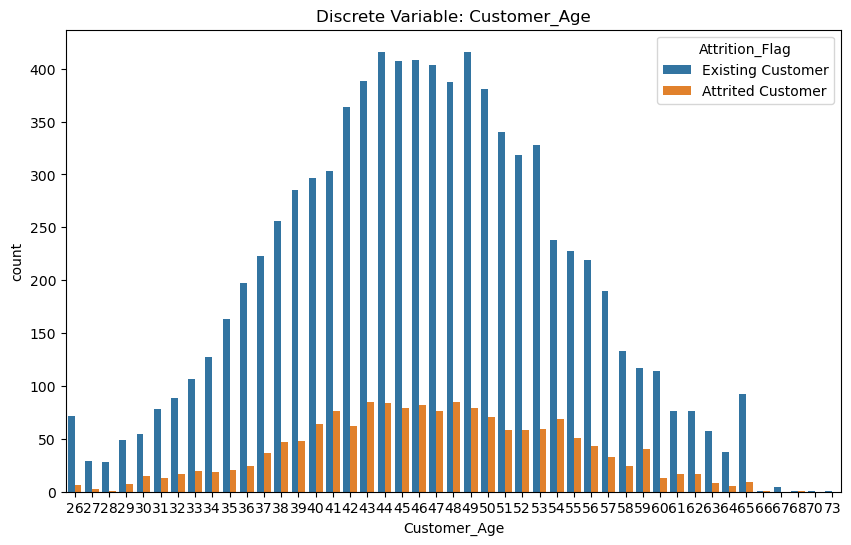

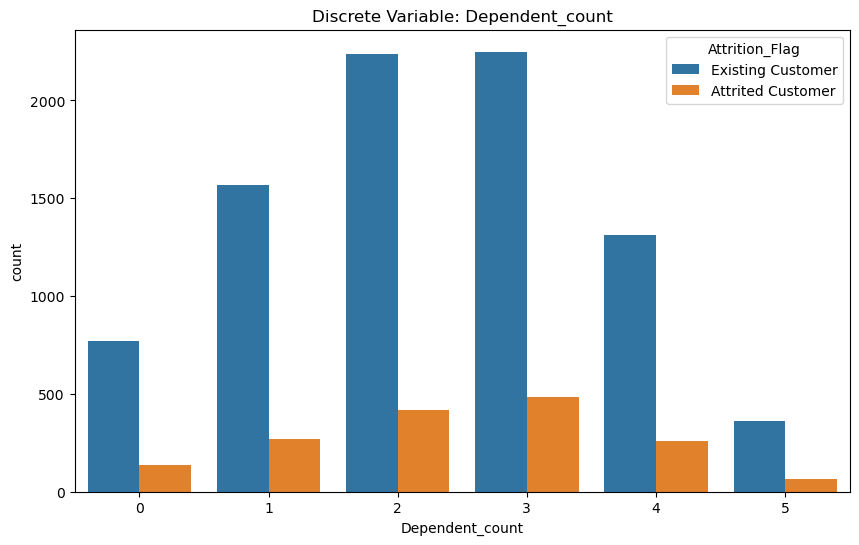

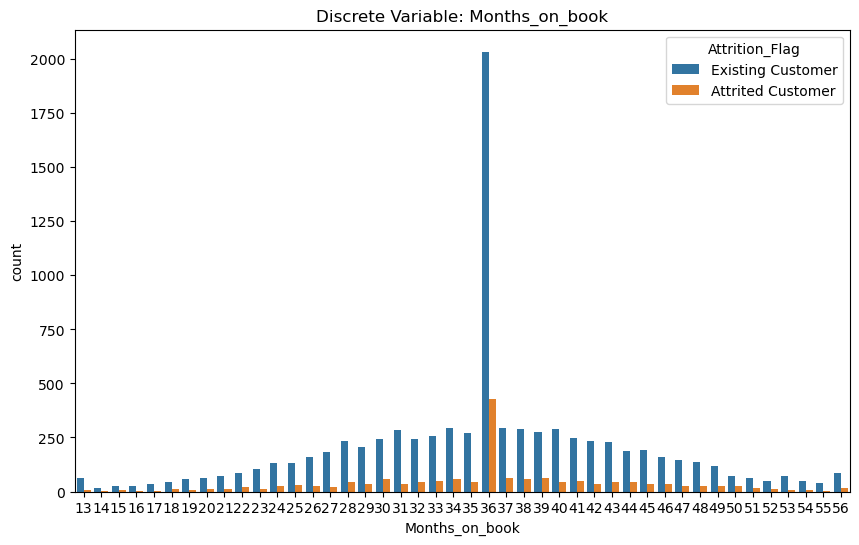

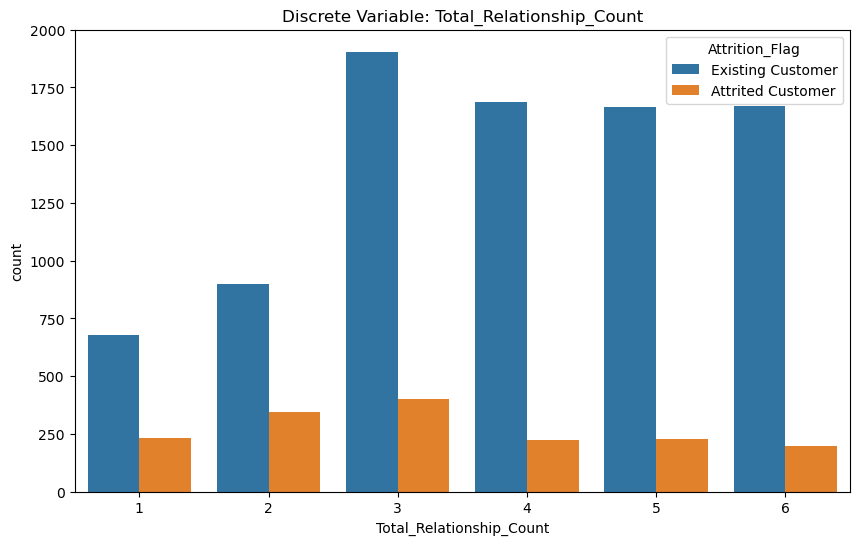

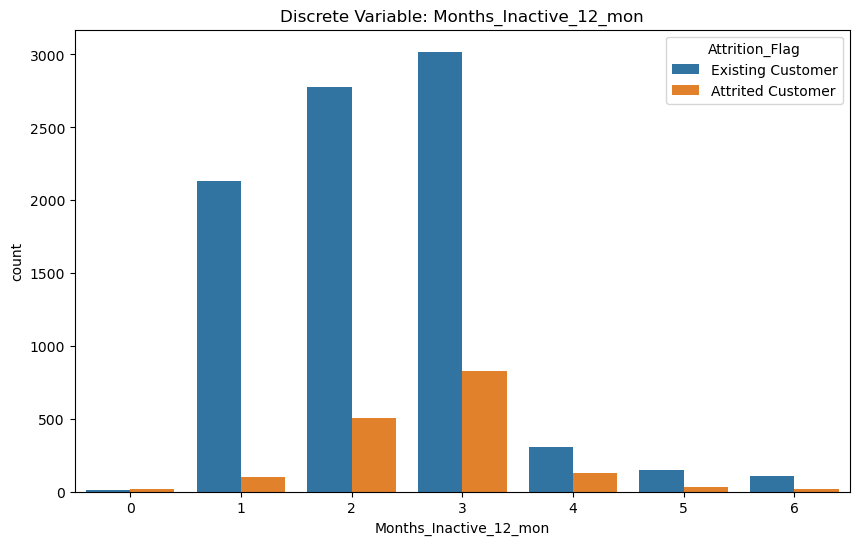

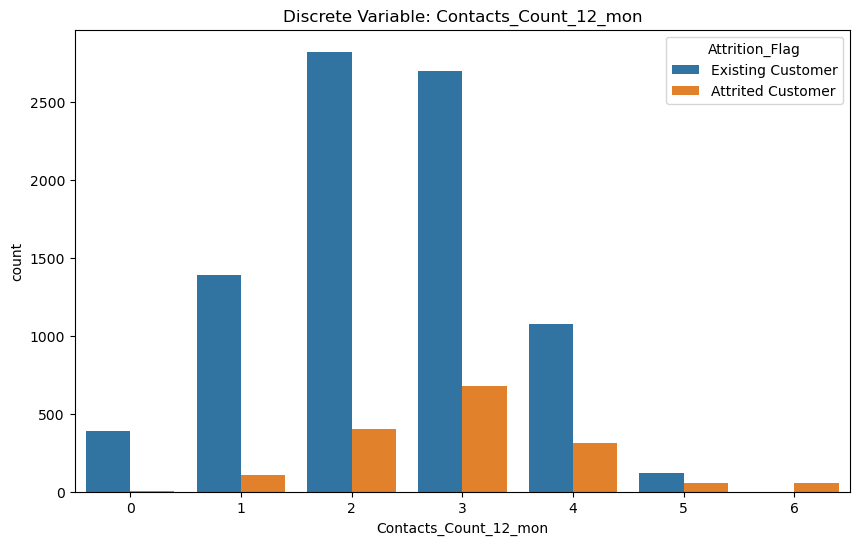

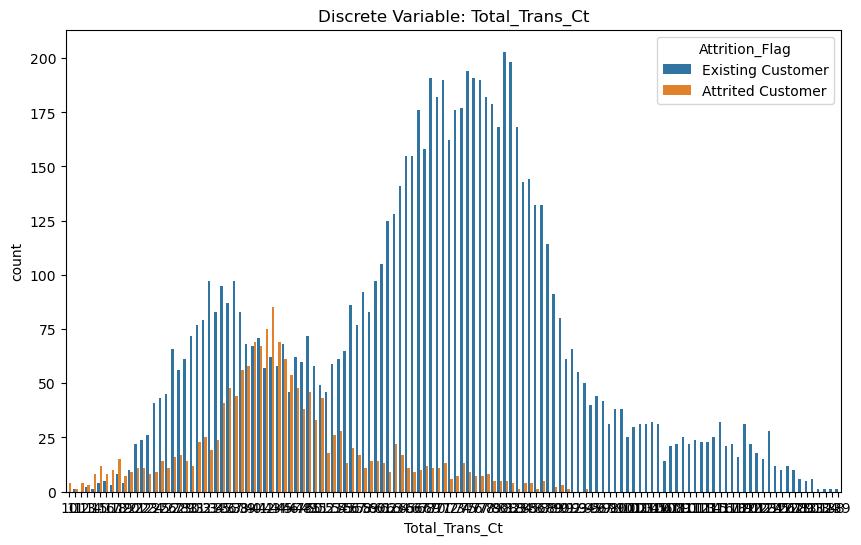

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


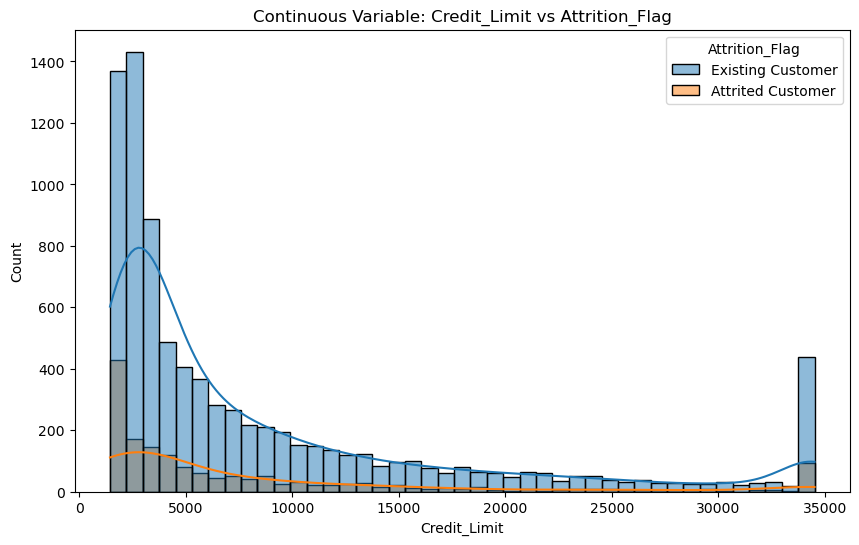

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


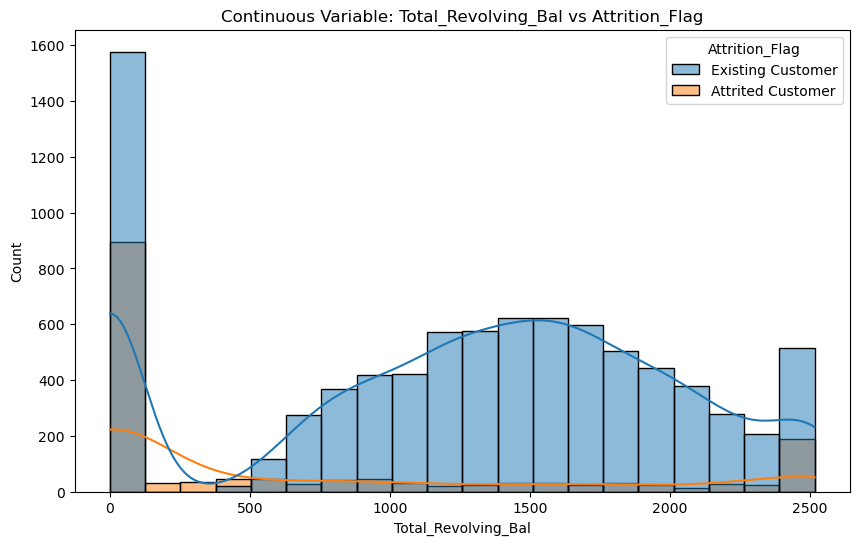

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


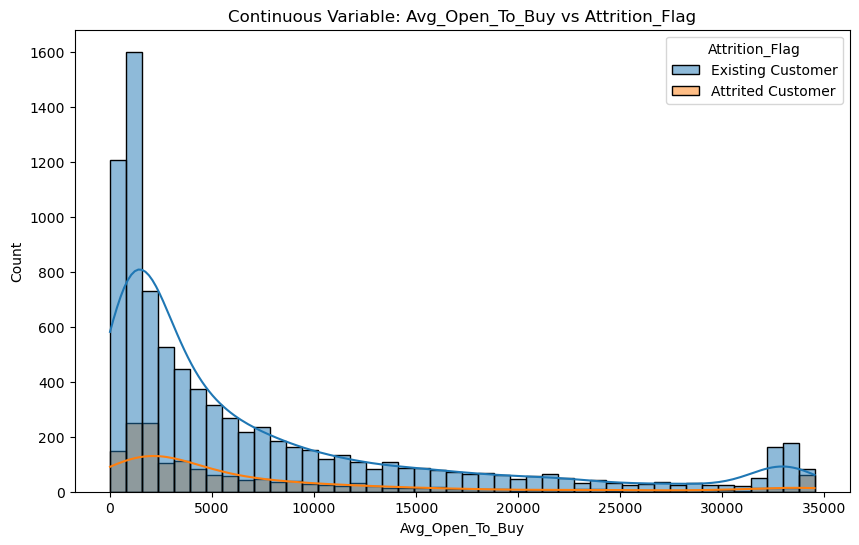

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


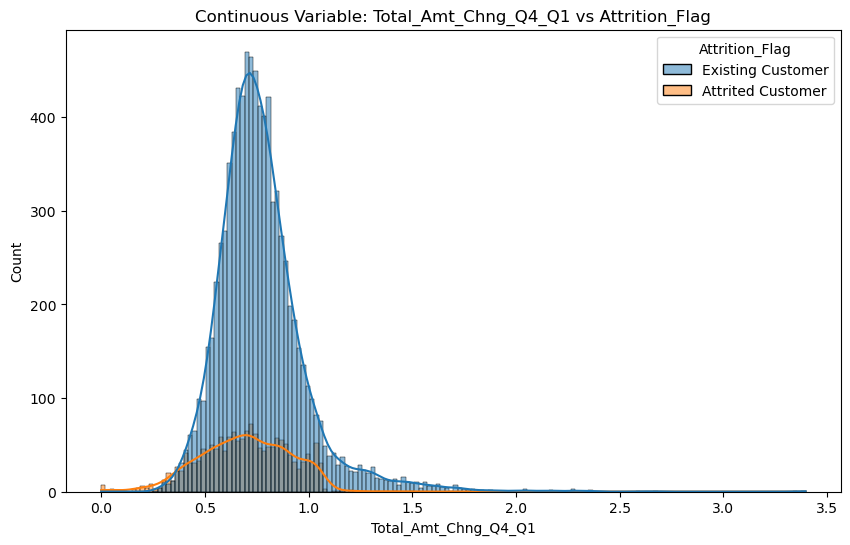

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


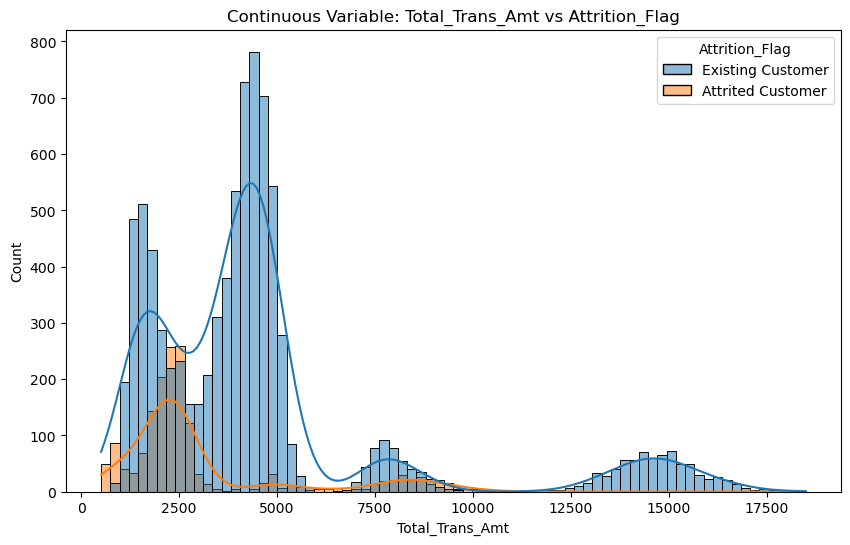

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


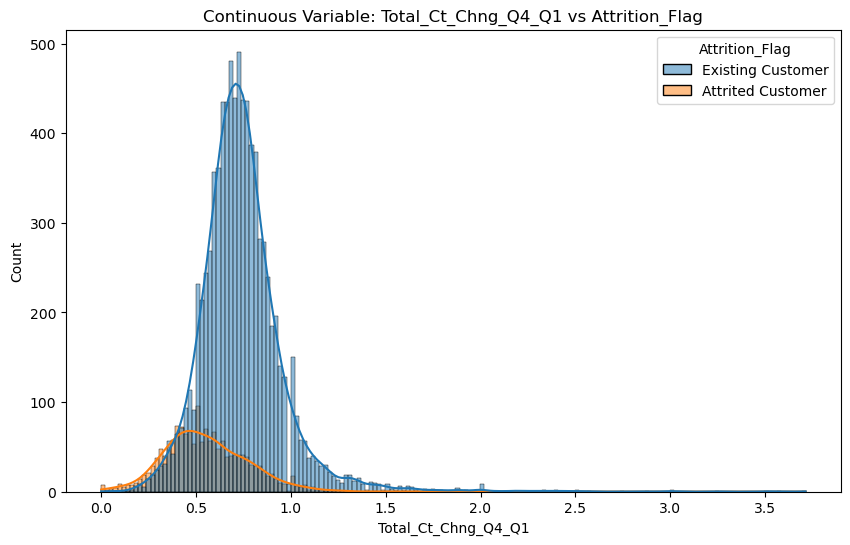

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


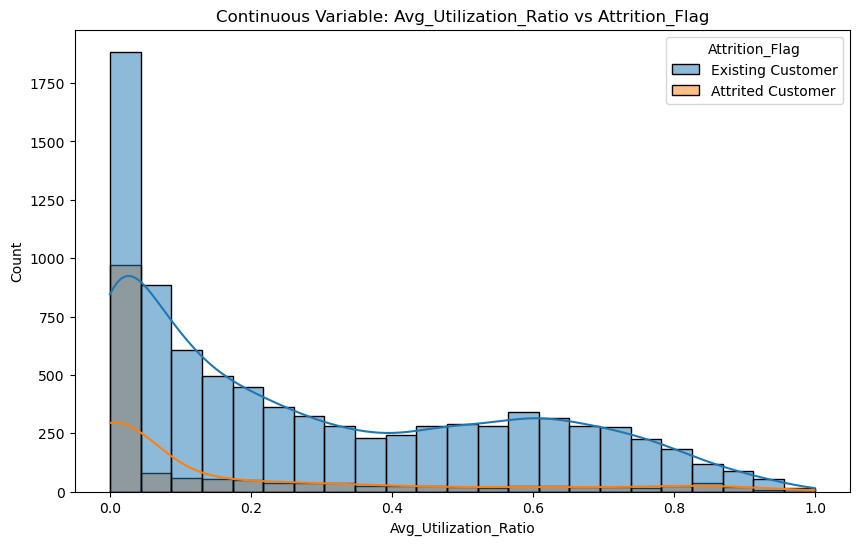

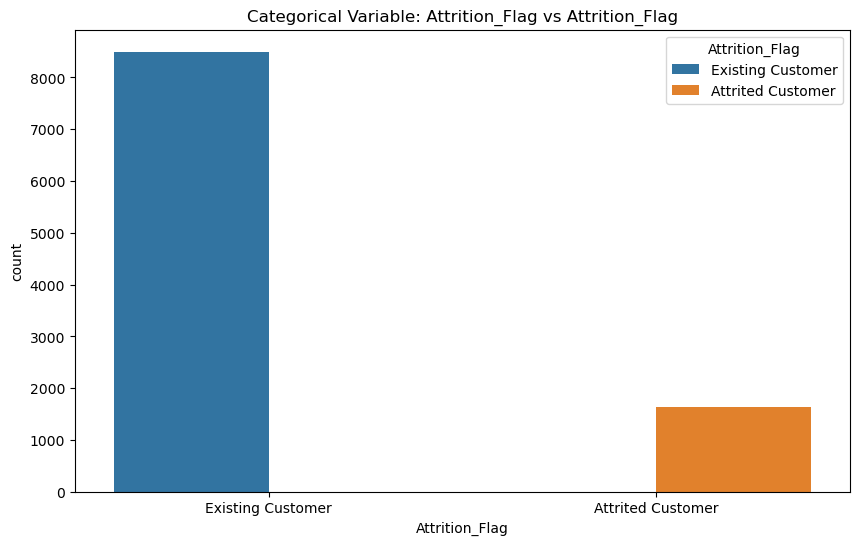

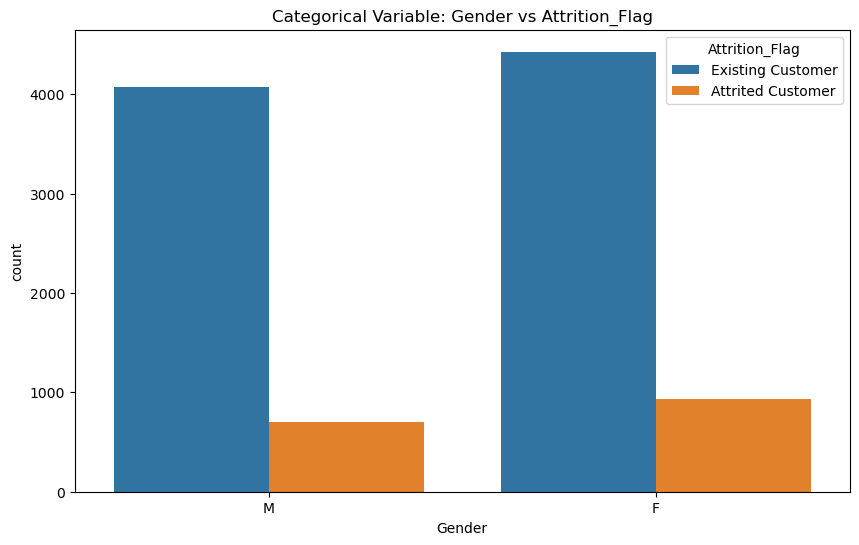

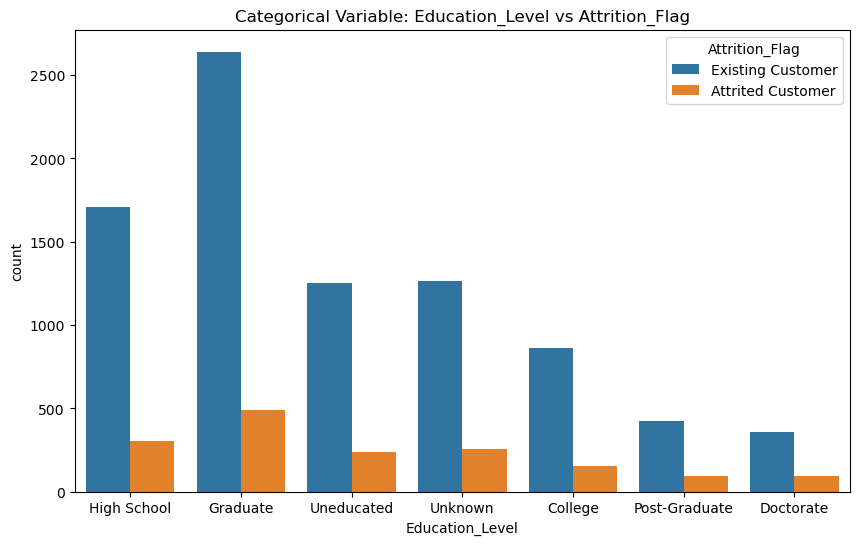

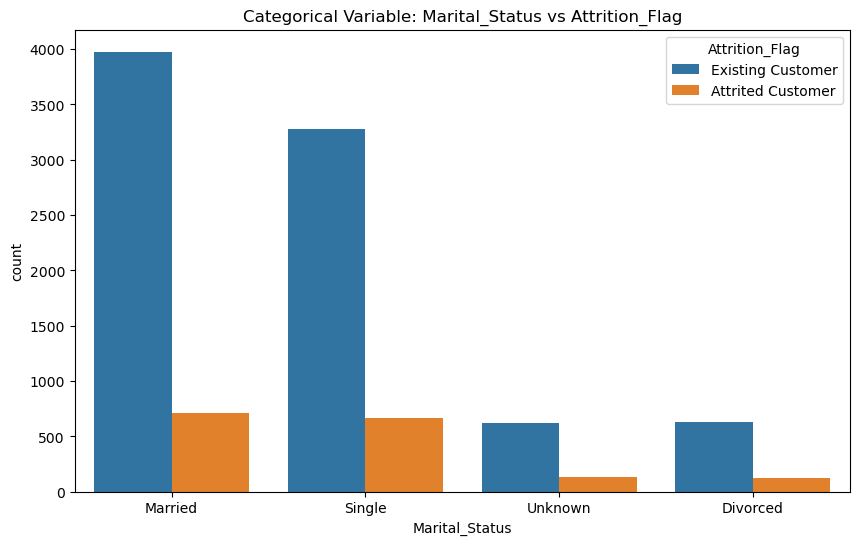

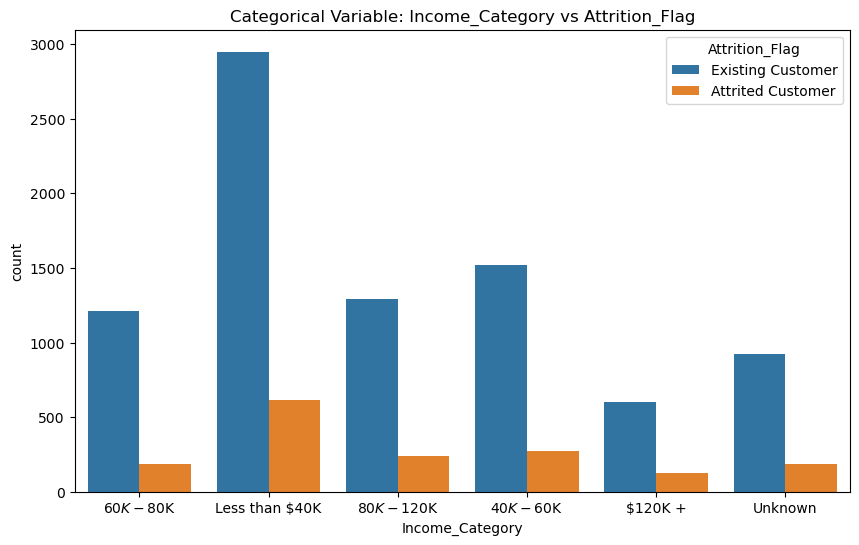

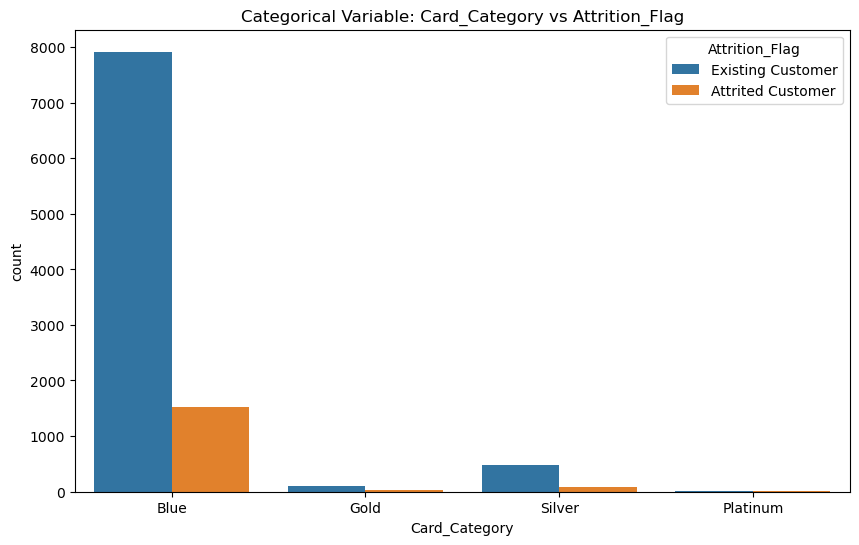

In [14]:
def plot_variable_relationships(data, discrete_vars, continuous_vars, categorical_vars, target_var='Attrition_Flag'):
    for var in discrete_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=var, hue=target_var)
        plt.title(f'Discrete Variable: {var}')
        plt.show()

    for var in continuous_vars:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=var, hue=target_var, kde=True)
        plt.title(f'Continuous Variable: {var} vs {target_var}')
        plt.show()

    for var in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=var, hue=target_var)
        plt.title(f'Categorical Variable: {var} vs {target_var}')
        plt.show()

plot_variable_relationships(master_data, discrete_vars, continuous_vars, categorical_vars, target_var='Attrition_Flag')


**Summary of Discrete Variable:**

The first bar chart presents the distribution of customers by age, with a distinction between existing and attrited customers. Most existing customers are between 40 and 55 years old, with a peak around 50. Attrited customers are relatively evenly distributed but show a slight increase in the same age range. The proportion of attrited customers appears to be consistent across different age groups, indicating age is not a strong factor in customer attrition.

The second bar chart illustrates the distribution of customers based on the number of dependents they have, categorized by attrition status. Existing customers are most common with 2 dependents, followed by those with 1 and 3 dependents. Attrited customers show a more evenly spread distribution across different dependent counts, with noticeable counts at 1, 2, and 3 dependents.

The third bar chart displays the distribution of customers based on their months on the book, categorized by whether they are existing or attrited. A significant peak is observed at 36 months for existing customers, indicating a large number of customers reach this tenure. Attrited customers are relatively consistent across different months, with slight increases around the same periods.

Fourth graph indicates both customer groups— ‘Existing Customers’ and ‘Attrited Customers’—show the highest count at 3 products. Surprisingly, this suggests that having more products is associated with a higher likelihood of attrition. In other words, customers who use more products are more prone to leaving the bank.
The fifth graph compares the count of “Existing Customers” (blue bars) and “Attrited Customers” (orange bars) based on their months of inactivity over a 12-month period. Surprisingly, both groups exhibit the highest count at 3 months of inactivity. This suggests that moderate inactivity is associated with a higher likelihood of attrition.
The sixth graph shows a clear trend: customers with more total transactions (likely indicated by the count on the X-axis) are less likely to churn (be existing customers, blue bars). This suggests that encouraging higher customer engagement through transactions could be a strategy to reduce churn.

**Summary of Continuous Numeric Variable:**

The seventh graph reveals a trend where customers with higher credit limits (X-axis) are more likely to be existing customers (blue bars). This suggests a potential correlation between higher credit limits and lower churn rates, indicating that customers with greater spending power might be more valuable and less likely to leave.

The eighth graph shows a counterintuitive trend: customers with higher credit limits (X-axis) are more likely to be existing customers (blue bars). While this could suggest higher credit limits lead to lower churn, it's also possible that these customers simply have more opportunities to spend and potentially churn later. Further analysis is needed to understand the underlying reasons behind this relationship.

The nine graph reveals a complex relationship between credit limit and customer churn. While existing customers (blue bars) tend to have higher credit limits (X-axis), this might not necessarily imply a causal effect. Customers with higher credit limits might also have more opportunities to spend and potentially churn later. More data analysis is needed to understand the underlying factors influencing churn behaviour.

The graph between the "Existing Customers” (blue bars) and “Attrited Customers” (orange bars) and the transaction amount indicate that a larger the transaction amount lower the attrition rate and the Average utilisation ratio also suggests that both the groups are there in the lower category, meaning lesser average credit utilisation more the churning as well.

**Summary of Categorical Variable:**

The graph analyses customer churn (existing vs. churned) across genders. Interestingly, the distribution of churn doesn't appear to be heavily skewed towards a specific gender (blue and red bars likely represent existing and churned customers, respectively). This suggests gender might not be a primary factor influencing customer churn in this dataset. 

This graph sheds light on customer churn (existing vs. churned) across education levels. Interestingly, graduates (potentially indicated by the highest bars for both blue and red) have the highest representation in both existing customer and churned customer groups. This suggests that education level alone might not be a strong predictor of churn for graduates.

This graph analyses customer churn (existing vs. churned) across income categories. Interestingly, the "High" income category has the highest number of customers, regardless of churn status (indicated by the highest bars for both blue, likely existing customers, and red, likely churned customers). While this might suggest a larger customer base in the "High" income category, it doesn't necessarily imply lower churn rates for this group. Further analysis is crucial to understand why even high-income customers churn and identify factors influencing churn behaviour across different income groups.

Each bar corresponds to a specific income range. Interestingly, the highest count of existing customers and attrited customers are in the “Less than $40K” range. Similarly, the highest number of existing and attrited customers use the Blue Credit Crad feature.

In almost all the variables, it is interesting to note that the highest percentage of attrited customers are there in the same category as that of the existing customers. Modifying servicers in the highest groups could enhance customer retention.

### Understanding the Relationship between the Variables

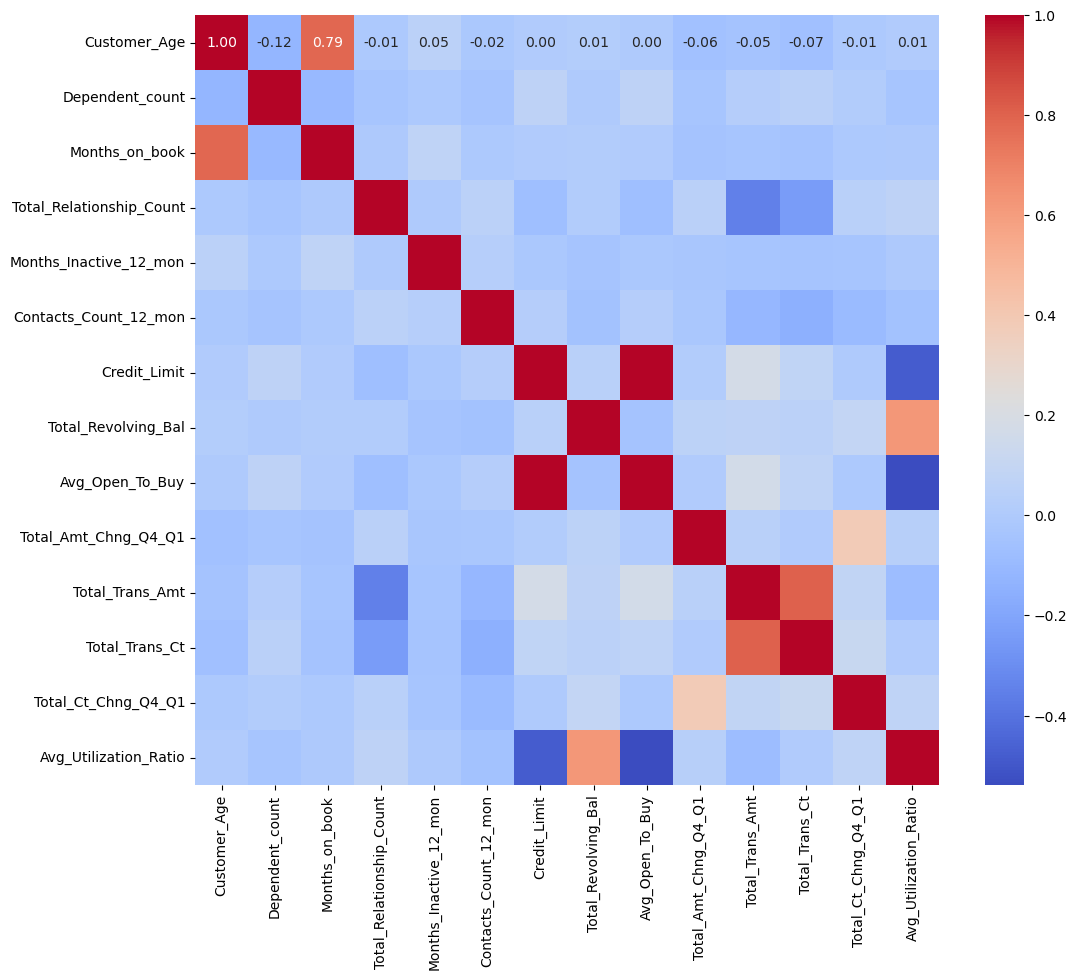

In [17]:
numeric_columns = master_data.select_dtypes(include=['int64', 'float64']).columns
df_numeric = master_data[numeric_columns]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

The heatmap represents correlation coefficients between various financial variables. Dark blue indicates negative correlation, while dark red signifies a high positive correlation. From the map, it is observed that Credit_limit and Avg_Open_to_Buy and a high positive correlation between Cutomer_Age and Months_on_Book. Total_Trans_Ct and Total_Trans_Amt have a higher positive correlation. 

Similarly, Avg_Utilisation_Ratio has a highly negative correlation with Credit_Limit and Avg_Open_To_Buy. Also, Total_Relationship_Count has a slightly negative relationship with Total_Trans_Amt and Total_Trans_Ct.

Overall, the heatmap looks has a cool shade indicating a lot of mild negative correlation between the variables. 

## Feature Engineering

### Missing Values 

There are no missing values in any of the variables.

In [21]:
missing_values = master_data.isnull().sum()
print(missing_values)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


### Data Scaling

In the data engineering phase, we utilized the StandardScaler from scikit-learn to normalize the numerical features in our dataset while preserving the categorical variables in there, labelled form. This approach is crucial as it standardizes numerical data, ensuring all features contribute equally to subsequent analyses without distorting the meaning or integrity of categorical data. By applying the StandardScaler exclusively to columns with numerical data types (float64 and int64), we transformed these features to have a mean of 0 and a standard deviation of 1. This normalization step enhances the performance and interpretability of machine learning models, facilitating more accurate predictions based on standardized numerical inputs while maintaining the categorical attributes in their meaningful categorical states.

In [23]:
numeric_columns = master_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
master_data[numeric_columns] = scaler.fit_transform(master_data[numeric_columns])
master_data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer     -0.165406      M         0.503368     High School   
1  Existing Customer      0.333570      F         2.043199        Graduate   
2  Existing Customer      0.583058      M         0.503368        Graduate   
3  Existing Customer     -0.789126      F         1.273283     High School   
4  Existing Customer     -0.789126      M         0.503368      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue        0.384621   
1         Single  Less than $40K          Blue        1.010715   
2        Married    $80K - $120K          Blue        0.008965   
3        Unknown  Less than $40K          Blue       -0.241473   
4        Married     $60K - $80K          Blue       -1.869317   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.763943               -1.327136               0.492404   
1                  1.407306               -1.327136              -0.411616   
2                  0.120579               -1.327136              -2.219655   
3                 -0.522785                1.641478              -1.315636   
4                  0.763943               -1.327136              -2.219655   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.446622            -0.473422         0.488971              2.623494   
1     -0.041367            -0.366667        -0.008486              3.563293   
2     -0.573698            -1.426858        -0.445658              8.367214   
3     -0.585251             1.661686        -0.734100              2.942843   
4     -0.430877            -1.426858        -0.302868              6.455682   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -0.959707       -0.973895             3.834003              -0.775882  
1        -0.916433       -1.357340            12.608573              -0.616276  
2        -0.740982       -1.911206             6.807864              -0.997155  
3        -0.951758       -1.911206             6.807864               1.759686  
4        -1.056263       -1.570365             7.509325              -0.997155

### Data Encoding

To feed the model, categorical data needs to be converted into numbers. We use label encoding is a technique used to convert categorical data into numerical data. We have assigned each unique category value an integer value. This method is useful when the categorical data is ordinal (where the order matters) but can also be applied to nominal data (where the order does not matter). We are encoding all the categorical variables as given below:

In [25]:
#Modifying the Target Variable
attrition_map = {'Attrited Customer': 1, 'Existing Customer': 0}
master_data['Attrition_Flag'] = master_data['Attrition_Flag'].replace(attrition_map)

# Modifying the Geneder Variable
gender_map = {'F': 1, 'M': 0}
master_data['Gender'] = master_data['Gender'].replace(gender_map)

# Modifying the Education Level
Education_map = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
master_data['Education_Level'] = master_data['Education_Level'].replace(Education_map)

# Modifying the Marital Status
marital_map={'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced':3}
master_data['Marital_Status'] = master_data['Marital_Status'].replace(marital_map)

# Modifying the Income Status
master_data['Income_Category'], categories = pd.factorize(master_data['Income_Category'])

# Modifying the Income Status
card_map={'Blue': 1, 'Gold': 2, 'Silver': 3, 'Platinum': 4}
master_data['Card_Category'] = master_data['Card_Category'].replace(card_map)

master_data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0     -0.165406       0         0.503368                2   
1               0      0.333570       1         2.043199                4   
2               0      0.583058       0         0.503368                4   
3               0     -0.789126       1         1.273283                2   
4               0     -0.789126       0         0.503368                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2                0              1        0.384621   
1               1                1              1        1.010715   
2               2                2              1        0.008965   
3               0                1              1       -0.241473   
4               2                0              1       -1.869317   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.763943               -1.327136               0.492404   
1                  1.407306               -1.327136              -0.411616   
2                  0.120579               -1.327136              -2.219655   
3                 -0.522785                1.641478              -1.315636   
4                  0.763943               -1.327136              -2.219655   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.446622            -0.473422         0.488971              2.623494   
1     -0.041367            -0.366667        -0.008486              3.563293   
2     -0.573698            -1.426858        -0.445658              8.367214   
3     -0.585251             1.661686        -0.734100              2.942843   
4     -0.430877            -1.426858        -0.302868              6.455682   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -0.959707       -0.973895             3.834003              -0.775882  
1        -0.916433       -1.357340            12.608573              -0.616276  
2        -0.740982       -1.911206             6.807864              -0.997155  
3        -0.951758       -1.911206             6.807864               1.759686  
4        -1.056263       -1.570365             7.509325              -0.997155

## Model Selection

Random Forest is an excellent choice due to its robustness, accuracy, and ability to handle imbalanced datasets by adjusting class weights or using techniques like SMOTE. It captures non-linear relationships and provides feature importance scores, aiding interpretability. Additionally, it requires less preprocessing, making it easier to implement. 

On the other hand, Neural Networks offer high flexibility and can model complex feature interactions that traditional algorithms might miss. They automatically learn relevant features, reducing the need for extensive feature engineering. Neural Networks handle large datasets effectively and benefit from advanced techniques like dropout and batch normalization, enhancing performance and generalization. 

Combining both models can leverage the strengths of each, with Random Forest providing a solid baseline and interpretability, while Neural Networks capture intricate patterns in the data. Experimenting with both and potentially using an ensemble approach can lead to the best predictive performance for credit card churn prediction.


### Random Forests

This below code snippet prepares a machine learning pipeline to predict customer attrition using a RandomForestClassifier. It starts by splitting the data into training and testing sets, ensuring balanced class distribution in the target variable. To handle imbalance, it employs SMOTE to oversample the minority class in the training data. The RandomForestClassifier is then trained on the resampled data and used to predict on the test set. 

Evaluation metrics such as accuracy, confusion matrix, classification report, and ROC-AUC score are computed and printed. Feature importances are extracted from the model and visualized to identify the top predictors of attrition. 



Accuracy: 0.9619940769990128
Confusion Matrix:
[[1663   38]
 [  39  286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.88      0.88      0.88       325

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

ROC-AUC Score: 0.988781259892371
Top Features:
                     Feature  Importance
15           Total_Trans_Amt    0.204701
16            Total_Trans_Ct    0.195672
12       Total_Revolving_Bal    0.130519
17       Total_Ct_Chng_Q4_Q1    0.089314
14      Total_Amt_Chng_Q4_Q1    0.054811
8   Total_Relationship_Count    0.051828
9     Months_Inactive_12_mon    0.049867
18     Avg_Utilization_Ratio    0.045735
10     Contacts_Count_12_mon    0.039662
0               Customer_Age    0.027934


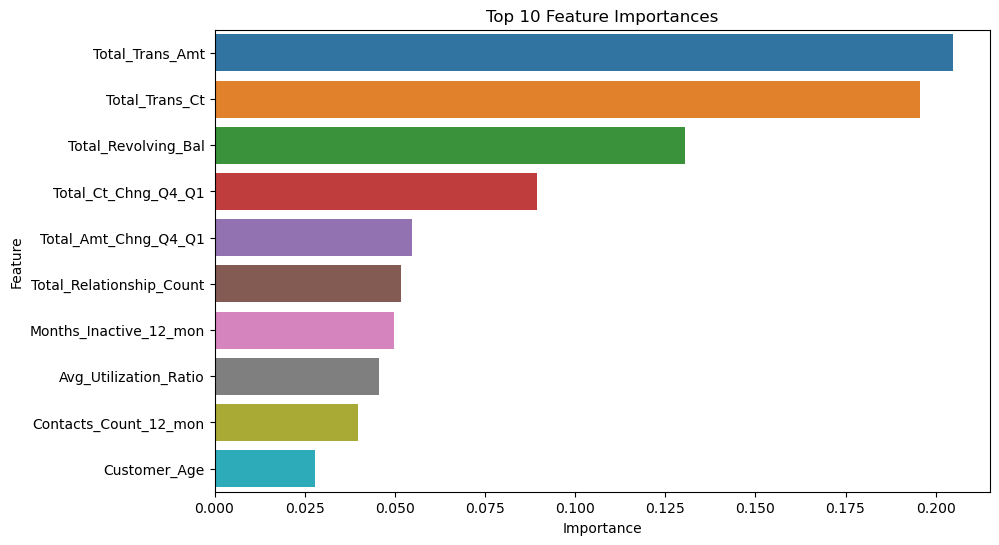

In [28]:
X_encoded = master_data.drop(['Attrition_Flag'],axis=1) 
y = master_data['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123, stratify=y)

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=123)

rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC-AUC Score: {roc_auc}')

importances = rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print('Top Features:')
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

The Random Forest model demonstrates strong performance in classifying the dataset, achieving an accuracy of 96.20%. This high accuracy indicates that the model correctly predicts 96.20% of instances. The confusion matrix provides further detail, showing 1663 true negatives, 38 false positives, 39 false negatives, and 286 true positives. This suggests the model is particularly accurate in identifying instances of class Existing Customer, with a relatively small number of misclassifications in both classes.

The classification report provides additional insights, with class Existing Customer having a precision of 0.98, recall of 0.98, and an F1-score of 0.98. For class Attrited Customer, the precision is 0.88, recall is 0.88, and the F1-score is 0.88. These metrics indicate that the model performs exceptionally well for class Existing Customer and maintains strong performance for class Attrited Customer, with slightly lower precision and recall. The overall accuracy of 96.20%, along with macro and weighted averages for precision, recall, and F1-score, supports the robustness of the model across all classes.

Additionally, the model's ROC-AUC score of 0.9888 highlights its excellent ability to discriminate between the classes, balancing a high true positive rate with a low false positive ra

te. The feature importance analysis identifies `Total_Trans_Amt`, `Total_Trans_Ct`, and `Total_Revolving_Bal` as the most influential features in the model's predictions. These features, related to transaction amount, transaction count, and revolving balance, play a crucial role in the model's decision-making proce

ss. Overall, the Random Forest model shows exceptional performance and reliability in classification tasks, supported by high accuracy, robust metrics, and significant feature insights.
hts.

### K-fold Cross Validation

Performing k-fold cross-validation after training a Random Forest model is essential for assessing its generalization performance and ensuring it does not overfit the training data. Random Forests, like other machine learning algorithms, require validation to verify their effectiveness on new, unseen data. By dividing the dataset into k subsets (folds), the model undergoes training and evaluation multiple times, with each fold serving alternately as a validation set. This approach provides a more reliable estimate of the model's performance compared to a single train-test split. 

It helps in detecting any potential issues such as overfitting or underfitting by evaluating performance across different data subsets. Additionally, k-fold cross-validation facilitates hyperparameter tuning by allowing practitioners to optimize model parameters based on averaged metrics across folds, ensuring the model's robustness and ability to generalize beyond the training data. Overall, k-fold cross-validation is integral in validating the Random Forest model's performance, enhancing its reliability, and supporting informed decision-making in model selection and deployment.

In [31]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=123)

kf = KFold(n_splits=10, shuffle=True, random_state=123)
cv_results = cross_val_score(random_forest_model, X_encoded, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_results}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_results)}')
print(f'Standard Deviation of Cross-Validation Accuracy: {np.std(cv_results)}')

y_pred = cross_val_predict(random_forest_model, X_encoded, y, cv=kf)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC-AUC Score: {roc_auc}')

Cross-Validation Accuracy Scores: [0.95459033 0.970385   0.96544916 0.96939783 0.96446199 0.96051333
 0.96051333 0.95454545 0.9673913  0.95750988]
Mean Cross-Validation Accuracy: 0.9624757597868031
Standard Deviation of Cross-Validation Accuracy: 0.005521339503683321
Confusion Matrix:
[[8399  101]
 [ 279 1348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.93      0.83      0.88      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.91      0.93     10127
weighted avg       0.96      0.96      0.96     10127

ROC-AUC Score: 0.9083181966086987


The Random Forest model exhibits strong and consistent performance in classifying the dataset, as evidenced by the cross-validation accuracy scores and the detailed metrics provided. The cross-validation accuracy scores range from 95.45% to 97.04%, with a mean accuracy of 96.25% and a standard deviation of 0.55%. This low standard deviation indicates that the model's performance is stable across different subsets of the data.

The confusion matrix further illustrates the model's performance, showing 8399 true negatives, 101 false positives, 279 false negatives, and 1348 true positives. This suggests the model is particularly accurate at identifying instances of Existing Customer, with relatively fewer misclassifications in both classes.

The classification report provides additional insights:
* For Existing Customer, the model achieves a precision of 0.97, recall of 0.99, and an F1-score of 0.98.
* For Attrited Customer, the model achieves a precision of 0.93, recall of 0.83, and an F1-score of 0.88.

These metrics indicate that while the model performs exceptionally well for Existing Customer, it also maintains strong performance for Attrited Customer, albeit with slightly lower recall. The overall accuracy of 96.20%, along with macro and weighted averages for precision, recall, and F1-score, supports the robustness of the model across all classes.

The ROC-AUC score of 0.9083 highlights the model's good ability to discriminate between the classes, balancing a high true positive rate with a low false positive rate. This score, while strong, suggests there is some room for improvement in distinguishing between the two classes.

Overall, the Random Forest model shows exceptional performance and reliability in classification tasks, supported by high accuracy, robust metrics, and consistent cross-validation results. The detailed metrics underscore the model's effectiveness and stability, making it a reliable choice for classification in the dataset.

## Neural Networks

### Data Architechture

The process begins with data ingestion using the Pandas library to load and preprocess data from external sources, typically stored in CSV or database formats. The data is prepared by encoding categorical features if necessary and separating the target variable. A train-test split is performed using train_test_split from Scikit-learn to partition the data into training and testing sets, ensuring model evaluation on unseen data. To handle class imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) from imblearn is employed, enhancing the model's ability to learn from minority class samples.

Next, dense layers are added sequentially, incorporating rectified linear unit (ReLU) activation functions for hidden layers to introduce non-linearity, and a sigmoid activation function in the output layer for binary classification. This architecture can be customized with varying numbers of layers and neurons to suit specific modeling requirements.

The model is compiled with the Adam optimizer for efficient gradient-based optimization and binary cross-entropy loss function to measure the model's performance for binary classification tasks. During training, the model is fitted to the resampled training data, specifying epochs and batch size parameters. A validation split is used to monitor training performance and prevent overfitting. Post-training, the model predicts on the test data to evaluate performance metrics such as accuracy, confusion matrix, classification report, and ROC-AUC score. These metrics are crucial for assessing the model's ability to generalize to new, unseen data and for understanding its predictive capabilities.

Visualization plays a vital role in model evaluation, facilitated by Matplotlib for plotting training and validation accuracy curves across epochs, as well as loss curves to monitor convergence and potential overfitting. This structured approach ensures a systematic workflow from data preprocessing and model development to evaluation and visualization, enabling robust and interpretable neural network models tailored to binary classification tasks in machine learning applications.

In [34]:
%%capture
pip install tensorflow

Epoch 1/50


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7541 - loss: 0.4920 - val_accuracy: 0.8357 - val_loss: 0.3866
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - loss: 0.2435 - val_accuracy: 0.9202 - val_loss: 0.2088
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.2048 - val_accuracy: 0.9132 - val_loss: 0.2370
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.1779 - val_accuracy: 0.8963 - val_loss: 0.2739
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9299 - loss: 0.1754 - val_accuracy: 0.9408 - val_loss: 0.1773
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9409 - loss: 0.1512 - val_accuracy: 0.9265 - val_loss: 0.1929
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9452 - loss: 0.1440 - val_accuracy: 0.9360 - val_loss: 0.1699
Epoch 8/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9446 - loss: 0.1471 - val_accuracy: 0.9537 - val_

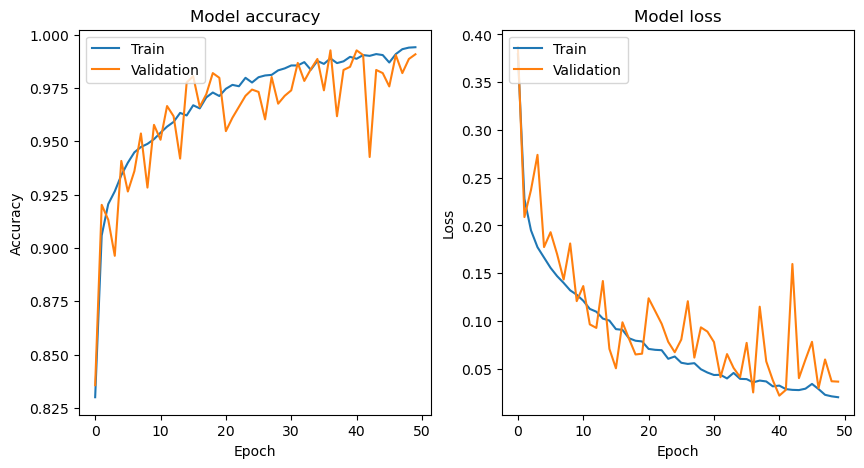

In [35]:
X_encoded = master_data.drop(['Attrition_Flag'],axis=1) 
y = master_data['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123, stratify=y)

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC-AUC Score: {roc_auc}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The results of the neural network training and validation indicate a generally robust model performance. The accuracy and loss plots over 50 epochs demonstrate the model's learning progression. The training accuracy steadily increased, converging around 0.99, while the validation accuracy, though more variable, generally followed an upward trend and stabilized between 0.97 and 0.98. This slight discrepancy suggests mild overfitting, where the model performs slightly better on training data compared to validation data.

The training loss decreased consistently, indicating effective learning, while the validation loss, despite some fluctuations, showed a downward trend. This behaviour is typical and expected, reflecting the model's capacity to generalize from the training data to unseen validation data. The epoch-by-epoch performance logs highlight substantial initial improvements in accuracy and significant reductions in loss, with more gradual enhancements as training progressed.

The final performance metrics further affirm the model's efficacy. The confusion matrix shows that the model correctly identified most instances of both classes, with 1631 true negatives, 275 true positives, 70 false positives, and 50 false negatives. The classification report reveals high precision and recall for Existing Customer (0.97 and 0.96, respectively) and somewhat lower, but still strong, metrics for Attrited Customer (0.80 precision and 0.85 recall). The overall accuracy stands at 0.94, indicating solid model performance. Moreover, the ROC-AUC score of 0.973 reflects an excellent ability to distinguish between the two classes.

In summary, the neural network exhibits high accuracy and low loss, suggesting effective learning and good generalization capabilities. While there is some overfitting, as indicated by the slight gap between training and validation performance, the model's strong metrics, including a high ROC-AUC score, confirm its effectiveness for the given task. Further fine-tuning, such as incorporating dropout or regularization techniques, could potentially mitigate overfitting and enhance the model's stability and performance.


### Conclusion

Based on the provided metrics, the Random Forest model demonstrates superior performance in churn prediction compared to the Neural Network model. The Random Forest model achieves an accuracy of 96.20%, which is higher than the Neural Network's accuracy of 94.08%. It also excels in precision, recall, and F1-score for both classes. Specifically, for the churn class (Attrited Customer), the Random Forest model achieves a precision of 0.88 and an F1-score of 0.88, outperforming the Neural Network's precision of 0.80 and F1-score of 0.82. Additionally, the Random Forest model's ROC-AUC score of 0.9888 is higher than the Neural Network's 0.9730, indicating better overall model performance in distinguishing between churn and non-churn customers. 

Furthermore, the confusion matrix for the Random Forest model shows fewer false positives (38 vs. 70) and false negatives (39 vs. 50) compared to the Neural Network. These results suggest that the Random Forest model is more effective in correctly identifying both churn and non-churn customers, which is critical for minimizing erroneous classifications in churn prediction. Therefore, the Random Forest model is preferable for this task due to its higher accuracy and better performance metrics across the board.

From the Random Forest model, it is clear that total transaction amount and total transaction count plays an important role in determining the customer churning. Developing strategies focusing on these variables have a high potential of customer retention.

The Neural Network's lower performance compared to the Random Forest could stem from overfitting, inadequate hyperparameter tuning, insufficient training data, or suboptimal feature engineering. Additionally, neural networks struggle more with imbalanced data, which was a factor here. They require careful handling of initial weights, regularization techniques, and often more training time and computational resources. If these aspects were not optimally managed, the model's ability to generalize would be compromised, leading to poorer performance in churn prediction.

As a part of further research, combining Random Forest and Neural Networks can leverage the strengths of both methods. Random Forest provides a solid baseline with interpretability, while Neural Networks capture intricate patterns in the data. An ensemble approach could optimize predictive performance for credit card churn prediction, offering the best of both worlds. Additionally, the final model is recommended to be tested with an unseen data to ensure prediction with high accuracy.
